### Peak Finding
#### scipy.signal.find_peaks

In [1]:
from scipy.signal import find_peaks
from matplotlib import pyplot as plt
from scipy.misc import electrocardiogram

In [2]:
data=electrocardiogram()[2000:4000]
data

array([-0.9  , -0.895, -0.895, ..., -0.67 , -0.65 , -0.615])

In [4]:
peaks,_=find_peaks(data,height=0)
peaks

array([  65,  251,  325,  331,  336,  386,  431,  464,  471,  475,  481,
        489,  494,  496,  500,  507,  512,  520,  524,  529,  535,  541,
        554,  560,  566,  571,  578,  584,  590,  595,  608,  620,  625,
        631,  637,  643,  651,  656,  661,  668,  675,  686,  692,  703,
        709,  717,  722,  729,  731,  733,  738,  747,  758,  763,  779,
        788,  793,  799,  808,  811,  813,  818,  825,  836,  849,  856,
        860,  863,  867,  871,  882,  888,  895,  908,  914,  927,  938,
        956,  967,  973,  980,  987,  992,  998, 1005, 1009, 1016, 1022,
       1029, 1034, 1040, 1044, 1051, 1064, 1070, 1077, 1082, 1094, 1099,
       1105, 1111, 1125, 1136, 1144, 1147, 1154, 1161, 1167, 1171, 1179,
       1186, 1188, 1190, 1201, 1206, 1210, 1220, 1236, 1244, 1249, 1255,
       1267, 1273, 1278, 1292, 1347, 1353, 1357, 1370, 1377, 1388, 1406,
       1412, 1417, 1456, 1614, 1776, 1948], dtype=int64)

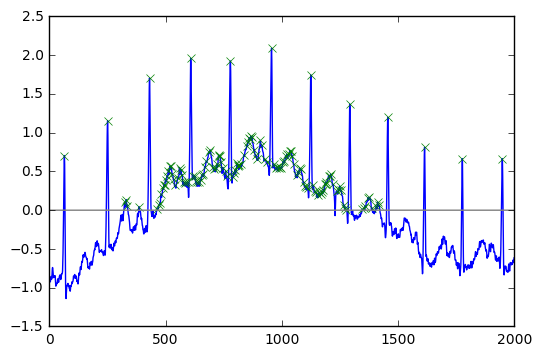

In [5]:
import numpy as np

%matplotlib inline
plt.plot(data)
plt.plot(peaks,data[peaks],"x")
plt.plot(np.zeros_like(data),"-",color="gray")
plt.show()

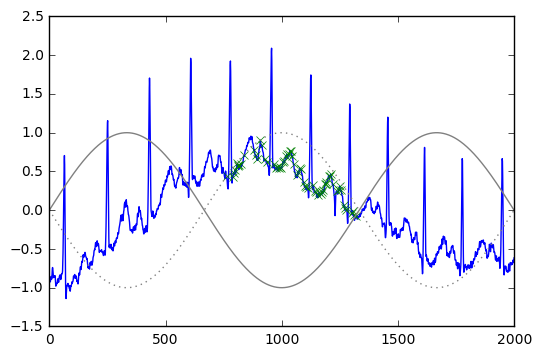

In [8]:
border=np.sin(np.linspace(0,3*np.pi,data.size))
peaks,_=find_peaks(data,height=[border,-border])
plt.plot(data)
plt.plot(peaks,data[peaks],"x")
plt.plot(border,"-",color="gray")
plt.plot(-border,":",color="gray")
plt.show()

In [39]:
peaks,_=find_peaks(data,distance=150)
np.diff(peaks)
print(peaks)

[  65  251  431  608  779  956 1125 1292 1456 1614 1776 1948]


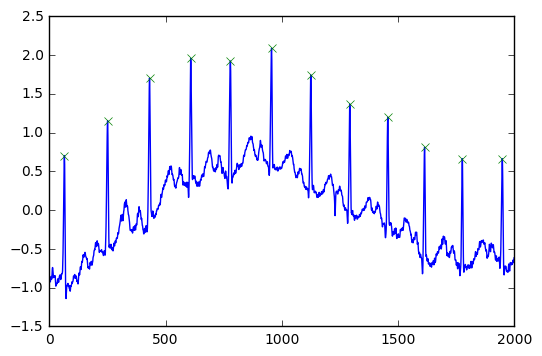

In [10]:
plt.plot(data)
plt.plot(peaks,data[peaks],"x")
plt.show()

#### prominence: vertical distance between the peak and its lowest contour line. Especially, noisy signal peaks can be wasily grouped by their prominence.

In [23]:
from scipy.signal import peak_prominences
peaks_all,_=find_peaks(data)
prominences,left_base,right_base=peak_prominences(data,peaks_all)
print(prominences)

[0.005 0.035 0.185 0.025 0.025 0.005 0.045 0.06  1.685 0.1   0.015 0.01
 0.015 0.025 0.12  0.03  0.01  0.025 0.035 0.01  0.03  0.215 0.005 0.01
 0.03  0.05  0.005 0.05  0.19  0.03  0.01  0.035 0.005 0.055 1.68  0.03
 0.05  0.025 0.035 0.025 0.005 0.015 0.075 0.08  0.065 0.44  0.01  0.01
 0.015 0.045 0.055 0.015 0.045 0.34  0.015 0.015 0.05  0.08  1.81  0.005
 0.07  0.025 0.005 0.01  0.005 0.02  0.04  0.02  0.015 0.005 0.025 0.015
 0.05  0.04  0.405 0.005 0.01  0.015 0.005 0.265 0.06  0.01  0.04  0.03
 0.05  0.065 1.685 0.05  0.03  0.025 0.05  0.055 0.01  0.025 0.035 0.015
 0.01  0.02  0.465 0.005 0.03  0.02  0.035 0.215 0.005 0.01  0.005 0.075
 0.095 0.015 1.575 0.005 0.02  0.04  0.08  0.015 0.005 0.03  0.035 0.015
 0.005 0.01  0.025 0.005 0.505 0.035 0.01  0.015 0.01  0.255 0.025 0.02
 0.025 2.935 0.045 0.015 0.035 0.01  0.03  0.01  0.015 0.015 0.03  0.05
 0.015 0.265 0.015 0.005 0.005 0.03  0.025 0.12  0.02  0.01  0.01  0.03
 0.015 1.585 0.055 0.02  0.005 0.035 0.05  0.01  0.03  0.03

In [54]:
from sklearn.cluster import KMeans
clf=KMeans(n_clusters=2).fit(np.expand_dims(prominences,1))
y=clf.predict(np.expand_dims(prominences,1))
print(set(y))
centers=clf.cluster_centers_
print(centers)

{0, 1}
[[0.04996377]
 [1.72333333]]


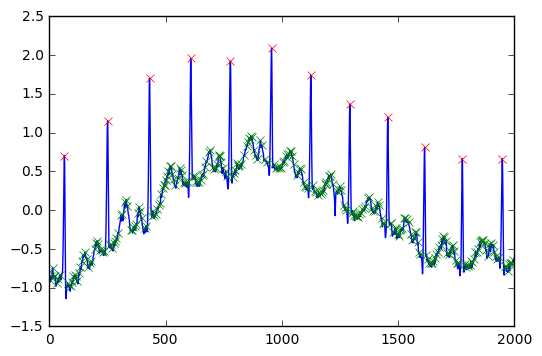

In [55]:
plt.plot(data)
plt.plot(peaks_all[y==False],data[peaks_all[y==False]],"x")
plt.plot(peaks_all[y==True],data[peaks_all[y==True]],"x")
plt.show()